In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Cleaning_Engineering/base_cleaned.csv")

In [3]:

# Calculate the base_price, quartiles, and means for each source-destination-cartye combination from the original data
base_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].min()
first_quartile_series = data.groupby(['source', 'destination', 'car_type'])['price'].quantile(0.25)
mean_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].mean()
third_quartile_series = data.groupby(['source', 'destination', 'car_type'])['price'].quantile(0.75)
max_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].max()

# Merge the base prices back into the original DataFrame
data = data.merge(base_price_series.rename('base_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(first_quartile_series.rename('first_quartile_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(mean_price_series.rename('mean_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(third_quartile_series.rename('third_quartile_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(max_price_series.rename('max_price'), on=['source', 'destination', 'car_type'])



In [4]:
# Data breakdown for each combination min, quartiles and max
base_price_df = base_price_series.reset_index(name='base_price')
distribution_df = base_price_df.merge(first_quartile_series.rename("first_quartile"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(mean_price_series.rename("mean_price"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(third_quartile_series.rename("third_quartile"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(max_price_series.rename("max_price"), on=['source', 'destination', 'car_type'])

In [5]:
car_types = list(set(distribution_df.car_type))

Each visual shows how for each car type how the distributioin differs per location. For example base price from Fenway might be different than another location which creates the distribtuion. Chart to chart comparision you can see the difference bectween car type prices.

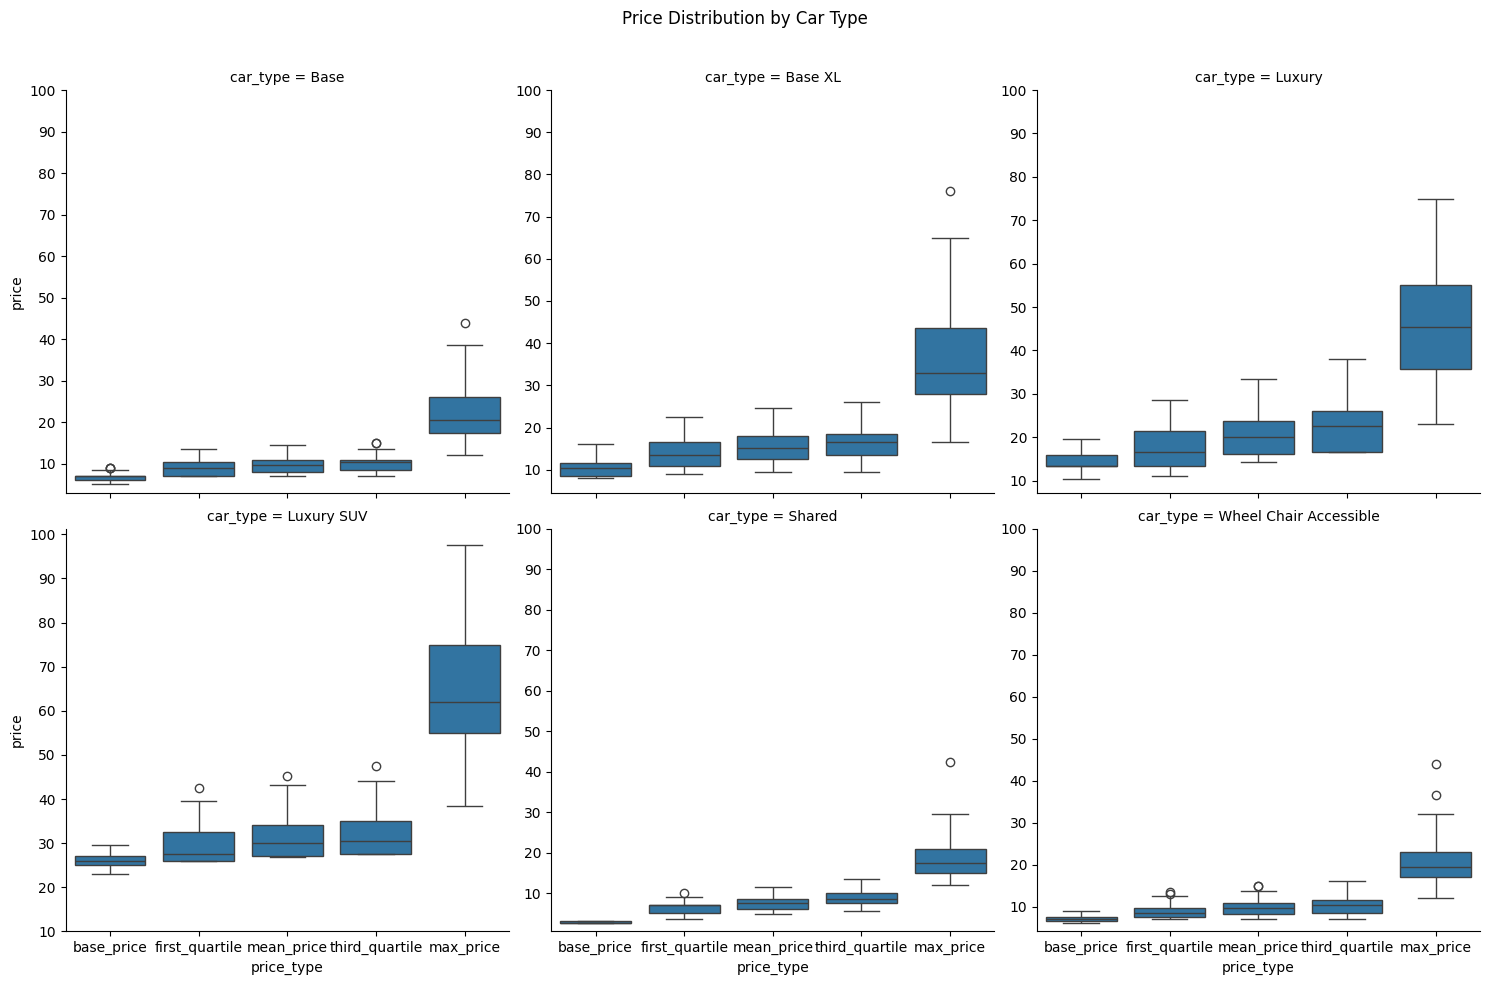

In [6]:
# You want to plot 'base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price'.

# You may need to reformat your data to have 'price_type' and 'price' columns.
df_melted = distribution_df.melt(id_vars=['source', 'destination', 'car_type'],
                                 value_vars=['base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price'],
                                 var_name='price_type', value_name='price')
# Set the order of the categories
price_type_order = ['base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price']

# Create a FacetGrid object with a boxplot for each 'car_type'
g = sns.FacetGrid(df_melted, col='car_type', col_wrap=3, sharex=True, sharey=False, height=5)

# Map the boxplot with the order of price types
g.map(sns.boxplot, 'price_type', 'price', order=price_type_order)


# Define the x-axis limits and ticks
y_ticks = list(range(10, 101, 10))
g.set(yticks=y_ticks)  # Set the same x-ticks for all the axes

# Adding some additional customizations
g.fig.subplots_adjust(top=0.9)  # Adjust the Figure in 'g'
g.fig.suptitle('Price Distribution by Car Type')

plt.show()


Demand Calculation is done in the following method so this would completely change to your methodology

In [7]:
# #Depreicated Function 
# # Would be used to calcualte demand estimation in an alternate way 
# # Function to calculate demand based on price, base_price, and max price within each DataFrame
# # def calculate_demand(df, base_price_df):
#     # Merge the base prices into the sampled DataFrame
#     # df = df.merge(base_price_df, on=['source', 'destination', 'car_type', 'base_price'], how='left')

#     # Find the max price for each source-destination within this subset
#     # max_price_df = df.groupby(['source', 'destination', 'car_type'])['price'].max().reset_index()
#     max_price_df.rename(columns={'price': 'max_price'}, inplace=True)
    
#     # Merge the max prices into the sampled DataFrame
#     # df = df.merge(max_price_df, on=['source', 'destination', 'car_type'], how='left')

#     # Calculate demand as a scaled value of the price between 0 and 1
#     # df['demand'] = (df['price'] - df['base_price']) / (df['max_price'] - df['base_price'])
# #

#     ## eta calculation is done here and added to base_price_df and saved so per combination and car type we have a starting point for eta for the price predicition df data 



#     # Handle cases where the max price is the same as the base price
#     df.loc[df['base_price'] == df['max_price'], 'demand'] = 1.0

#     return df

# # Now apply the function to calculate demand for both price_df and eta_df
# price_df = calculate_demand(price_df, base_price_df)
# eta_df = calculate_demand(eta_df, base_price_df)

